<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Please-feel-free-to-contact-me-@:-kevin.elgui@gmail.com-for-remarks-or-questions." data-toc-modified-id="Please-feel-free-to-contact-me-@:-kevin.elgui@gmail.com-for-remarks-or-questions.-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>Please feel free to contact me @: <a href="mailto:kevin.elgui@gmail.com" target="_blank">kevin.elgui@gmail.com</a> for remarks or questions.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Les-données" data-toc-modified-id="Les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les données</a></span><ul class="toc-item"><li><span><a href="#Traitement-des-données-manquantes" data-toc-modified-id="Traitement-des-données-manquantes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Traitement des données manquantes</a></span></li><li><span><a href="#Conversion-des-variables-catégorielles" data-toc-modified-id="Conversion-des-variables-catégorielles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conversion des variables catégorielles</a></span></li></ul></li><li><span><a href="#Régression-logistique" data-toc-modified-id="Régression-logistique-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Régression logistique</a></span><ul class="toc-item"><li><span><a href="#Evaluation-des-performances." data-toc-modified-id="Evaluation-des-performances.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Evaluation des performances.</a></span><ul class="toc-item"><li><span><a href="#Evaluation-des-performances" data-toc-modified-id="Evaluation-des-performances-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Evaluation des performances</a></span></li></ul></li></ul></li><li><span><a href="#Courbe-ROC" data-toc-modified-id="Courbe-ROC-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Courbe ROC</a></span></li></ul></div>

#### Please feel free to contact me @: kevin.elgui@gmail.com for remarks or questions.

In [276]:
import numpy as np
import pandas as pd

# Les données

<font color="red">Charger le fichier csv 'data/titanic_train.csv' sour forme de dataframe.</font>

In [277]:
df = pd.read_csv('../data/titanic_train.csv')

<font color='red'>
Inspecter les données, et à l'aide de la méthode df.head, afficher les premières lignes.
</font>

In [278]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color="red">
Utiliser la méthode "describe" et répondre aux questions suivantes :  
- Moyenne d'âge des passagers ?  
- Âge du passager le plus âgé ?  
- Pourcentage de passagers ayant survécu ?  
</font>

In [279]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [280]:
df[df.Survived == 1]['Survived'].count() /df.Survived.count() 

0.3838383838383838

Moyenne d'âge des passagers est 29.67. Âge du passager le plus âgé est 80. 38.39% de passagers a survécu.

<font color="red">Calculer le nombre d'hommes et le nombre de survivants chez les hommes à l'aide de la fonction pandas df.sum
</font>

In [281]:
print("Nombre d'hommes:", (df['Sex'] == 'male').sum())
print("Nombre d'hommes survivants:", (df[df['Survived'] == 1]['Sex'] == 'male').sum())

Nombre d'hommes: 577
Nombre d'hommes survivants: 109


<font color="red">Tracer l'histogramme des âges et/ou des classes. On pourra s'aider de la méthode df.hist </font>

In [282]:
import matplotlib.pyplot as plt
%matplotlib inline

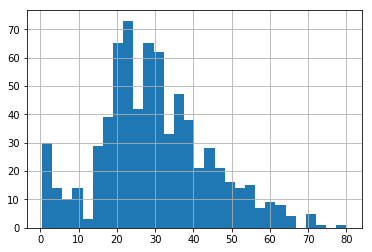

In [283]:
df.Age.hist(bins = 30)

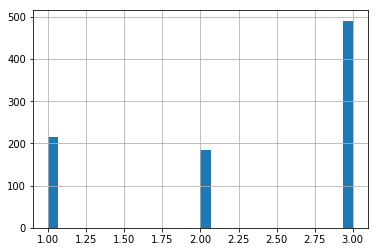

In [285]:
df.Pclass.hist(bins=30)

## Traitement des données manquantes

<font color="red">Evaluer le nombre de données manquantes par colonne à l'aide de la méthode df.count  </font>

In [190]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color="red">
Supprimer les colonnes non-informatives ou comportant trop de données manquantes à l'aide de la méthode df.drop. Pensez à bien fixer la valeur du paramètre "inplace" à True. 
</font>

In [288]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

<font color="red">
Avec la méthode fillna(), créer une nouvelle dataframe où les NaN sont remplacées par la médiane de la colonne.
</font>

In [289]:
df.median()
df.fillna(df.median(), inplace=True).tail()

AttributeError: 'NoneType' object has no attribute 'tail'

<font color="red">
Vérifier qu'il n'y a plus de données manquantes, ou s'il en reste quelques unes, supprimer les lignes correspondantes.</font>

In [292]:
df.dropna(inplace=True)

In [293]:
df.count()

Survived    889
Pclass      889
Sex         889
Age         889
SibSp       889
Parch       889
Fare        889
Embarked    889
dtype: int64

## Conversion des variables catégorielles


<font color="red">
Vérifier que 'sex' et 'embark' sont les seules variables catégorielles. On pourra par exemple utiliser la méthode df.dtypes 
</font>


In [195]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

<font color="red">
    À l'aide de la méthode pandas: df.get_dummies ou (c'est plus difficile) des méthodes scikit learn: LabelEncoder et OneHotEncoder, convertissez ces colonnes en variables "one-hot". On renvoie à l'aide de scikit learn: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
<font> 
<font color="black"> Dans une version beta de scikit, on y trouve la classe CategoricalEncoder; pour ceux qui l'ont, vous êtes libres de vous en servir.
    <font> 

In [196]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
5,0,3,28.0,0,0,8.4583,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,1,0,0,1
8,1,3,27.0,0,2,11.1333,1,0,0,0,1
9,1,2,14.0,1,0,30.0708,1,0,1,0,0


<font color="black">
   Remarque: Pensez bien à supprimer (si ce n'est pas déjà fait) les colonnes catégorielles "sex" et "embarked". Le      DataFrame final ne devra plus que comporter les colonnes "sex" et "embarked" encodées en One-Hot.
    <font>

# Régression logistique

In [197]:
# Réponse et matrice de design
y = df.Survived.values
X = df.drop(columns='Survived').values
feature_names = df.drop(columns='Survived').columns
print(y[:5])
print(X[:4,:])

[0 1 1 1 0]
[[ 3.     22.      1.      0.      7.25    0.      1.      0.      0.
   1.    ]
 [ 1.     38.      1.      0.     71.2833  1.      0.      1.      0.
   0.    ]
 [ 3.     26.      0.      0.      7.925   1.      0.      0.      0.
   1.    ]
 [ 1.     35.      1.      0.     53.1     1.      0.      0.      0.
   1.    ]]


<font color="red">
Utilisez scikit-learn et la classe LogisticRegression de sklearn.linear_model pour entraîner un classifieur sur les données d'apprentissage. Essayez de justifier le choix de vos paramètres.
</font>

Pour davantage d'informations, on renvoie à la documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.



In [198]:
from sklearn.linear_model import LogisticRegression

In [294]:
classifier = LogisticRegression(C=1e15).fit(X, y)

print(classifier.coef_[0])

[-1.09863719e+00 -3.93279557e-02 -3.24208701e-01 -8.86420629e-02
  1.93969725e-03  2.37686641e+00 -3.43011881e-01  8.36023993e-01
  7.73233196e-01  4.24597345e-01]


## Evaluation des performances.

<font color="red">
En utilisant la fonction train_test_split du module sklearn.model_selection, séparer la dataframe en une data-frame de données et un data-frame de test (on choisira un découpage de la base en 90% de train et 10% de test).
</font>


On renvoie à la documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

Quel paramètre nous permettrait de rendre notre split reproductible?

In [302]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1)

<font color="red">
Apprendre le modèle sur la base de train en utilisant l'un des algorithmes vus plus haut.
</font>

In [303]:
classifier =  LogisticRegression().fit(X, y)

### Evaluation des performances

La matrice de confusion est
$$
\begin{pmatrix}
tp & fp \\ fn & tn
\end{pmatrix}
$$
où
- tp = nombre de vrais positifs (la vraie valeur est 1, la décision est 1)
- fp = nombre de faux positifs (la vraie valeur est 0, la décision est 1 : erreur de type I ou "fausse alarme")
- fn = nombre de faux négatifs (la vraie valeur est 1, la décision est 0 : erreur de type II ou "manque")
- tn = nombre de vrais négatifs (la vraie valeur est 0, la décision est 0)  

<font color="red">
En utilisant la fonction confusion_matrix du module sklearn.metrics, calculez la matrice de confusion afin d'évaluer la performance du classifieur.
</font>

In [295]:
from sklearn.metrics import confusion_matrix
ypred = classifier.predict(X_test)
cm = confusion_matrix(ytest, ypred)

<font color="red">
Complétez les deux dernières déclarations et comparez les deux matrices de confusion.
</font>

In [296]:
p = (ytest==1)
n = (ytest==0)
t = (ypred == 1)
f = (ypred == 0)
tp = (f & n).sum()
tn = (f & p).sum()
fp = (t & n).sum()
fn = (t & p).sum()
confusion_matrix = np.array([[tp,fp],[fn,tn]])
print(confusion_matrix)

[[38 21]
 [13 17]]


<font color="red">
Estimer :  
- la probabilité de fausse alarme  (c'est à dire la probabilité de décider '1' lorsque le label est '0')  
- la puissance (c'est à dire la probabilité de décider '1' lorsque le label est '1')
</font>

In [299]:
pfa = fp/(tp + fp)
power = tp/(fn+tp)
print(pfa, power)

0.3559322033898305 0.7450980392156863


# Courbe ROC
Si on diminue le seuil, on augmente le nombre de fausses alarmes et on augmente également la puissance.  
La courbe ROC est l'ensemble des couples (pfa,power) pour toutes les valeurs de seuil possibles.  


<font color="red">
À l'aide de la fonction roc_curve du module sklearn.metrics, afficher la courbe ROC ('power' en fonction de 'PFA') </font>

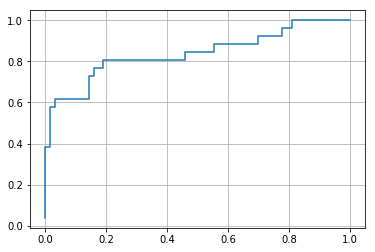

In [304]:
from sklearn import metrics
soft = classifier.predict_proba(Xtest)[:, 1]
pfa, power, _ = metrics.roc_curve(ytest, soft)
plt.plot(pfa, power)
plt.grid()

Good Job ! 